1. Import required libraries

In [11]:
import pandas as pd

2. Read the dataset

In [12]:
data = pd.read_csv('Maths.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


3. How many rows the dataset contains?

In [13]:
rows = len(data)
rows

395

4. Does the dataset contain NaNs?

In [14]:
check = data.isna().any().any()
if check:
    print("Yes")
else:
    print("No")


No


5. Compare students with parents living apart vs students whose parents live together. Which group consumes more alcohol?

Чи студенти, у яких батьки живуть окремо, споживають більше алкоголю, ніж студенти, у яких батьки живуть разом

In [15]:
tog = data[data['Pstatus'] == 'T'].Walc.sum() / len(data[data['Pstatus'] == 'T'])
ap =data[data['Pstatus'] == 'A'].Walc.sum() / len(data[data['Pstatus'] == 'A'])
ap > tog

False

6. Do families living in village have more children? Report the difference in %.

Наскільки більше у відсотках сільські сім'ї мають більше дітей?

In [24]:
cleardata = data[data['famsize']== 'GT3']
rbigfams = len(cleardata[data['address'] == 'R']) / len(data[data['address'] == 'R'])*100
ubigfams = len(cleardata[data['address'] == 'U']) / len(data[data['address'] == 'U'])*100
result = (max([rbigfams, ubigfams])/min([rbigfams, ubigfams])-1)*100
print(f'{round(result,2)}%')

11.37%


C:\Users\Катерина\AppData\Local\Temp\ipykernel_13452\418269145.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rbigfams = len(cleardata[data['address'] == 'R']) / len(data[data['address'] == 'R'])*100
C:\Users\Катерина\AppData\Local\Temp\ipykernel_13452\418269145.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ubigfams = len(cleardata[data['address'] == 'U']) / len(data[data['address'] == 'U'])*100


7. Does the lack of internet influence the student marks?

Наскільки відсутність інтернету дома впливає на оцінки студента?

In [16]:
data['G4'] = data['G1']+ data['G2'] +data['G3']
data.groupby('internet')['G4'].mean()

internet
no     29.500000
yes    32.547112
Name: G4, dtype: float64

8. Does alcohol consumption during weekends influence the absence at lessons?

Наскільки вживання алкоголю по вихідним впливає на пропуски занять?

In [17]:
data.groupby('Walc')['absences'].mean()

Walc
1    4.854305
2    4.588235
3    6.425000
4    8.333333
5    6.892857
Name: absences, dtype: float64

9. Compare students whose parents work at health vs others. Does the level of alcohol comsumptions at weekdays differ for those 2 groups?

Чи відрізняється показник вживання алкоголю по буднях у студентів, у яких батько або мати працюють у сфері охорони здоров'я порівняно з іншими студентами?

In [19]:
h_workers = data[(data['Mjob'] == 'health') | (data['Fjob'] == 'health')]
nh_workers = data[(data['Mjob'] != 'health') & (data['Fjob'] != 'health')]
alcohol_h = h_workers['Dalc'].mean()
alcohol_nh = nh_workers['Dalc'].mean()
print(f'Difference of the level of alcohol comsumptions by students at weekdays,\
whose parents work at health vs others {round(alcohol_h - alcohol_nh,3)} ')

Difference of the level of alcohol comsumptions by students at weekdays,whose parents work at health vs others -0.225 


10. Compare students living in village vs city. Which group of students miss more lessons?

Яка група студентів більше пропускає занять: ті, які живуть у місті, чи в селах?

In [20]:
vstudents = data[data['address'] == 'R'] 
cstudents = data[data['address'] == 'U']
vabs = vstudents['absences'].mean()
cabs = cstudents['absences'].mean()
if vabs > cabs:
    print('Vilage students miss more lessons')
elif cads > vabs :
    print('City students miss more lessons')
else:
    print('Absense is equel')

Vilage students miss more lessons


11. What is the % of students with max level of health does extra-curricular activities?

Який відсоток студентів, які мають максимальну оцінку здоров'я, відвідують позапланові заходи?

In [21]:
mh_students = data[data['health'] == 5]
total_mh_students = len(mh_students)
activ_count = len(mh_students[mh_students['activities'] == 'yes'])
per_a = (activ_count / total_mh_students) * 100
print(f"{per_a:.2f}% of students with max health do extra-curricular activities")

52.74% of students with max health do extra-curricular activities


12. Consider a group of families with 3 and more children vs a group of all other students. Which group has better family relationship?

Які сім'ї мають кращі стосунки у сім'ї: багатодітні (3 і більше дітей) чи з 1-2 дітьми?

In [22]:
big_fam = data[data['famsize']=='GT3']
small_fam = data[data['famsize'] == 'LE3']
avg_famrel_bigf = big_fam['famrel'].mean()
avg_famrel_smallf = small_fam['famrel'].mean()
if avg_famrel_bigf > avg_famrel_smallf: 
    print('A group of families with 3 and more children have better relationship')
elif avg_famrel_bigf < avg_famrel_smallf: 
    print('Small family have better relationship ')
else:
    print('It is equel')

A group of families with 3 and more children have better relationship


13. Report the % of students with family relationship <= 2 that do not want to take higher education.

Який відсоток студентів з сімейними стосунками <= 2 не хочуть отримувати вищу освіту в майбутньому? 

In [23]:
low_famrel = data[data['famrel'] <= 2]
total_low = len(low_famrel)
no_higher_edu = len(low_famrel[low_famrel['higher'] == 'no'])
per_no_he = (no_higher_edu / total_low) * 100
print(f'{per_no_he:.2f}%')

3.85%


14. Report the % of students who consume more than average amount of alcohol going out with friends the most?

Який відсоток студентів, які споживають взагальному(і по буднях і по вікендах) алкоголю більше середнього, гуляють з друзями найбільше?

In [9]:
aver_alco = data['Walc'].mean() + data['Dalc'].mean()
high = data[(data['Walc']+data['Dalc'] > aver_alco) & (data['goout'] == 5)]
total_high = len(high)
total_students = len(data)
per_high= (total_high/total_students)*100
print(f'{per_high:.2f}%')

9.87%


15. Come up with 3 more questions and provide solutions for them.

Придумайте своїх 3 запитання і напишіть для них розв'язок.

15.1 Погрупувати респондентів за статтю та віком

In [25]:
grouped_data = data.groupby(['age', 'sex'])
mean_age_by_group = grouped_data['age'].mean()
print(mean_age_by_group)


age  sex
15   F      15.0
     M      15.0
16   F      16.0
     M      16.0
17   F      17.0
     M      17.0
18   F      18.0
     M      18.0
19   F      19.0
     M      19.0
20   F      20.0
     M      20.0
21   M      21.0
22   M      22.0
Name: age, dtype: float64


Щось повізуалізуємо

In [28]:
import matplotlib.pyplot as plt


15.2 Зробимо кругову діаграму розподілу за статтю

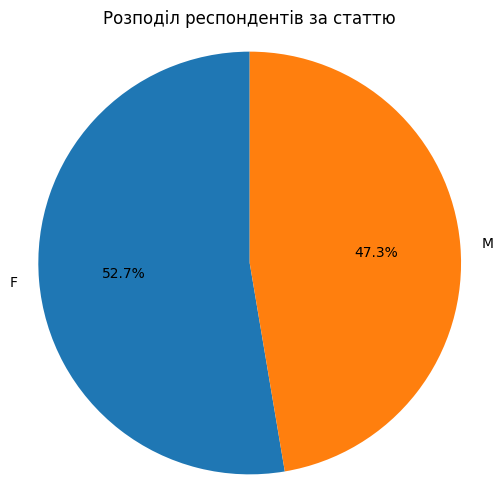

In [32]:
gender_counts = data['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Розподіл респондентів за статтю')
plt.axis('equal')
plt.show()


15.3 А тепер ще подивимося на розподіл за місцем роботи

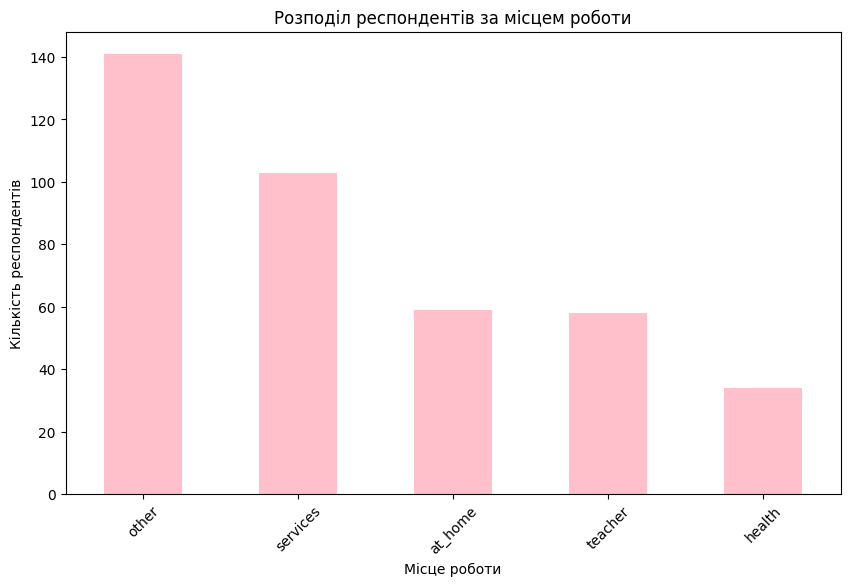

In [31]:
workplace_counts = data['Mjob'].value_counts()
plt.figure(figsize=(10, 6))
workplace_counts.plot(kind='bar', color='pink')
plt.title('Розподіл респондентів за місцем роботи')
plt.xlabel('Місце роботи')
plt.ylabel('Кількість респондентів')
plt.xticks(rotation=45)  
plt.show()